<h1><font size = 8><center>Assignment 3</center></font></h1>
<h1><center>Zach Chase</center></h1>

In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score, validation_curve

# Question 1
## Part A
Upload the data into Python and check for missing data. If there is any missing data, drop 
the cases that have the missing data. 

In [2]:
data = pd.read_csv("BlueOrRed.csv")

In [3]:
data.head()

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church,Undecided
0,51,1,1,1,4,171.0,15,0,1
1,46,1,1,1,6,420.0,15,1,0
2,55,1,0,1,6,132.0,16,0,1
3,50,1,0,1,4,18.0,8,0,0
4,49,1,1,1,2,66.0,15,1,1


In [4]:
data.isna().sum()

Age              0
HomeOwner        0
Female           0
Married          0
HouseholdSize    0
Income           0
Education        0
Church           0
Undecided        0
dtype: int64

## Part B
Normalize the continuous variables using min-max normalization. You should obtain a 
new dataset that has your normalized continuous input variables, the categorical input 
variables (the categorical input variables are fine and don’t need to be normalized), and 
your output variable.

In [5]:
data.dtypes

Age                int64
HomeOwner          int64
Female             int64
Married            int64
HouseholdSize      int64
Income           float64
Education          int64
Church             int64
Undecided          int64
dtype: object

In [6]:
scaler = MinMaxScaler()
columns_no_transform = ['HomeOwner', 'Female', 'Married', 'Education', 'Church', 'Undecided']
data_to_transform = data.drop(columns_no_transform, axis = 1)
scaler.fit(data_to_transform)
transformed = pd.DataFrame(scaler.transform(data_to_transform), columns = ['Age', 'HouseholdSize', 'Income'])
original = data[columns_no_transform]
data = pd.concat([transformed, original], axis = 1)
data.head()

,Age,HouseholdSize,Income,HomeOwner,Female,Married,Education,Church,Undecided
0,0.523810,0.500000,0.306422,1,1,1,15,0,1
1,0.444444,0.833333,0.763303,1,1,1,15,1,0
2,0.587302,0.833333,0.234862,1,0,1,16,0,1
3,0.507937,0.500000,0.025688,1,0,1,8,0,0
4,0.492063,0.166667,0.113761,1,1,1,15,1,1


## Part C
Why do you think using min-max normalization is a better choice for this situation 
compared to using other scalers such as the Standard Scaler which standardizes the data?

## Part D
Use the train_test_split() function in the sklearn.model_selection module in scikit-learn to 
split the data into training and test sets. Your test set should be 30% of the entire data. 
Print the shape of the X_train, y_train, X_test and y_test data. You can use the default 
value of the random state in splitting the data, which is random_state=42. 

In [7]:
X = data.drop(['Undecided'], axis = 1)
y = data['Undecided']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7000, 8)
(7000,)
(3000, 8)
(3000,)


## Part E
Construct a decision tree and fit the tree into the data. Then use your decision tree model 
to make predictions on the training set as well as on the test set. Assign your results to 
y_train_pred and y_test_pred respectively. Print out the first 100 predictions for each of 
the  y_train_pred and y_test_pred. 

In [8]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

print('y train predictions: \n', y_train_pred[:100])
print('y test predictions: \n', y_test_pred[:100])

y train predictions: 
 [0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0
 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1]
y test predictions: 
 [0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0]


## Part F
Find the overall accuracy of the tree model on the training set and on the test set. Use the 
accuracy_score() function in the sklearn.metrics module. Does the tree overfit the model? 
Why or why not?  

In [9]:
accuracy_score(y_train_pred, y_train)

1.0

In [10]:
accuracy_score(y_test_pred, y_test)

0.969

## Part G
Also, use the .score() method of the tree estimator to find the overall accuracy on the 
training set and test set. 

In [11]:
dt.score(X_train, y_train)

1.0

In [12]:
dt.score(X_test, y_test)

0.969

## Part H
Use the zero_one_loss() function inside the sklearn.metric module to compute the overall 
prediction error of the tree model on the test set and training set. 

In [13]:
zero_one_loss(y_train_pred, y_train)

0.0

In [14]:
zero_one_loss(y_test_pred, y_test)

0.031000000000000028

# Question 2
## Part A
Generate the classification report using the classification_report () 

In [15]:
print(classification_report(y_test_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1805
           1       0.96      0.96      0.96      1195

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



## Part B
Generate the confusion matrix using confusion_matrix() 

In [16]:
confusion_matrix(y_test_pred, y_test)

array([[1763,   42],
       [  51, 1144]])

## Part C
Generate the precision score using precision_score() 

In [17]:
precision_score(y_test_pred, y_test)

0.9645868465430016

## Part D
Generate the recall score using recall_score()

In [18]:
recall_score(y_test_pred, y_test)

0.9573221757322176

## Part E
Generate the f1 score using f1_score()

In [19]:
f1_score(y_test_pred, y_test)

0.9609407811843762

## Part F
When is it more appropriate to use f1 score (or precision score and recall) compared to 
using the overall accuracy to evaluate your model?

Since the F1 Score is the weighted average of Precision and Recall, it is better to use this when the dataset is unbalanced. On the other hand, accuracy is typically a better metric to use the classes are balanced and there is no major downside to predicting false negatives.

## Part G
Generate a roc curve using plot_roc_curve() 

/Users/zachchase/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


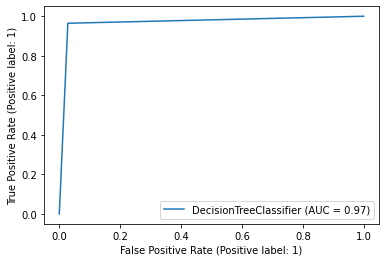

In [20]:
plot_roc_curve(dt, X_test, y_test)
plt.show()

## Part H
Plot the confusion matrix using plot_confusion_matrix

/Users/zachchase/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


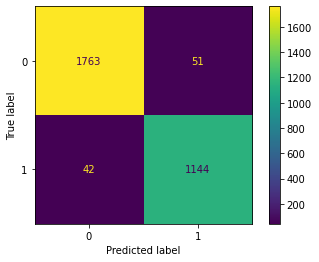

In [21]:
plot_confusion_matrix(dt, X_test, y_test)
plt.show()

# Question 3
## Part A
First retrieve the maximum depth of this decision tree. Use clf.tree_.max_depth where 
clf is the name of your estimator and tree is the module in sklearn.

In [22]:
dt.tree_.max_depth

18

## Part B
You will find the optimal depth of the tree by tuning the max_depth hyperparameter. 
Write a for loop to iteratively compute the overall error rate of the model on the test set 
only for the possible values of the maximum depth of the tree. 

Then plot the overall error rate on the y-axis and the maximum depth of the tree on the x-
axis. Also use np.argmin() on the error rates you obtained to retrieve the optimal 
maximum depth of the tree with the least error rate. Does this value match with what you 
see on your plot? 

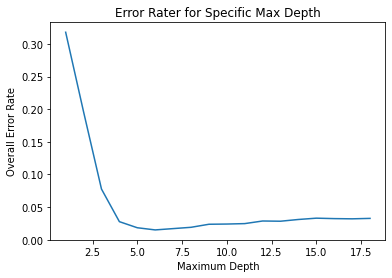

In [23]:
error_rates = defaultdict()
for i in range(1, dt.tree_.max_depth+1):
    new_dt = DecisionTreeClassifier(max_depth=i)
    new_dt.fit(X_train, y_train)
    e = zero_one_loss(y_test, new_dt.predict(X_test))
    error_rates[i] = e
    
plt.plot(error_rates.keys(), error_rates.values())
plt.xlabel("Maximum Depth")
plt.ylabel("Overall Error Rate")
plt.title("Error Rater for Specific Max Depth")
plt.show()

In [24]:
optimal_max_depth = np.argmin(list(error_rates.values()))
print("The optimal max depth is ", list(error_rates.keys())[optimal_max_depth])

The optimal max depth is  6


Note that this value looks like it matches that of my plot.

## Part C
Now, you will still find the optimal maximum depth of the decision tree model using grid 
search cross validation. Additionally, you will be simultaneously optimizing the 
max_features hyperparameter as well. You can check the documentation to see what 
these hyperparameters represent. You will use the GridSearchCV() constructor inside the 
sklearn.model_selection module. Make sure to pass the arguments (estimator and 
param_grid into the GridSearchCV() constructor. Set the parameter cv=8. Do you have 
the same optimal maximum depth as you got in the question above?  (

In [25]:
param_grid = {'max_depth':range(1,dt.tree_.max_depth+1),
             'max_features':[0.2,0.4,0.6,0.8]}

pipe = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=8)
pipe.fit(X_train, y_train)

GridSearchCV(cv=8, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 19),
                         'max_features': [0.2, 0.4, 0.6, 0.8]})

In [26]:
pipe.best_params_

{'max_depth': 8, 'max_features': 0.6}

Here we found the hyperparameter of max_depth to be the same, with a value of 6

## Part D
You will tune the maximum depth hyperparameter again using cross validation but this 
time, you will use the cross_val_score() function inside the sklearn.model_selection 
module. You will use this cross_val_score() function in combination with a for loop to 
find the optimal maximum depth of the tree. 

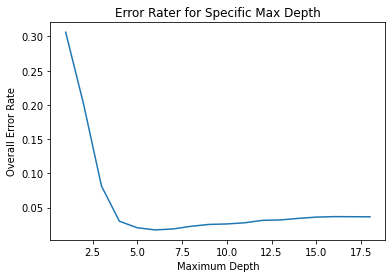

In [27]:
error_rates = defaultdict()
for i in range(1, dt.tree_.max_depth+1):
    new_dt = DecisionTreeClassifier(max_depth=i)
    new_dt.fit(X_train, y_train)
    scores = cross_val_score(new_dt, X=X_train, y=y_train, scoring='accuracy', cv=8)
    error_rates[i] = 1 - scores.mean()
    
plt.plot(error_rates.keys(), error_rates.values())
plt.xlabel("Maximum Depth")
plt.ylabel("Overall Error Rate")
plt.title("Error Rater for Specific Max Depth")
plt.show()

In [28]:
optimal_max_depth = np.argmin(list(error_rates.values()))
print("The optimal max depth is ", list(error_rates.keys())[optimal_max_depth])

The optimal max depth is  6


Once again, this matches previous results and the graph above.

## Part E
You will use another approach to plot the error rates versus the maximum depth of the 
tree. Here, you would use the validation_curve() function inside the 
sklearn.model_selection module. This function implements cross validation and returns 
the training accuracy scores and test (validation) accuracy scores for each iteration in the 
k-fold cross validation, for each of the hyperparameter values. You will need to aggregate 
the scores using np.mean(axis=1) to get the average of the accuracy scores for all 
iterations, for each hyperparameter value. Use these average accuracy scores to obtain 
corresponding error rates for the training and test (validation) sets. Then plot the error 
rates on the training set versus the maximum depth values. Also plot on the same figure, 
the error rates of the test (or validation) set versus the maximum depth values. What is 
the optimal maximum depth? (

In [29]:
train_scores, test_scores = validation_curve(DecisionTreeClassifier(), X_train, y_train,
                                       param_name = "max_depth",
                                       param_range = range(1, dt.tree_.max_depth + 1),
                                        cv = 8, scoring = "accuracy")

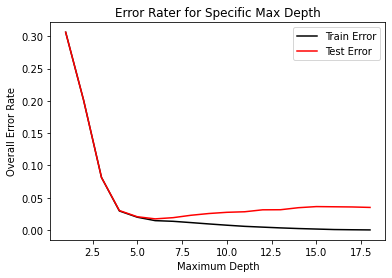

In [30]:
train_scores_error = 1 - np.mean(train_scores, axis = 1)
test_scores_error = 1 - np.mean(test_scores, axis = 1)

    
plt.plot(range(1, dt.tree_.max_depth + 1), train_scores_error, color = 'black', label = 'Train Error')
plt.plot(range(1, dt.tree_.max_depth + 1), test_scores_error, color = 'red', label = 'Test Error')
plt.xlabel("Maximum Depth")
plt.ylabel("Overall Error Rate")
plt.title("Error Rater for Specific Max Depth")
plt.legend()
plt.show()

In [31]:
optimal_max_depth = np.argmin(test_scores_error)
print("The optimal max depth is ", range(1,dt.tree_.max_depth+1)[optimal_max_depth])

The optimal max depth is  6


# Question 4
## Part A
State your research question, for example: Are decision trees and random forest good 
models for predicting whether someone will default on a loan or not based on their 
age and income level? This is just an example, your dataset does not have to be (or 
should not be) about loans. 

Are decision trees and random forests good models for predicting whether a leaf is classified as either simple or complex. This question arrises from the leaf dataset gathered from: https://archive.ics.uci.edu/ml/datasets/Leaf.

## Part B
Data pre-processing (to the extent deemed necessary)

In [32]:
columns = ['species', 'specimen_number', 'eccentricity', 'aspect_ratio', 'elongation', 
        'solidity', 'stochastic_convexity', 'isoperimetric_factor', 'maximal_indentation_depth', 'lobedness',
        'average_intensity', 'average_contrast', 'smoothness',  'third moment', 'uniformity', 'entropy']
leaf = pd.read_csv('leaf.csv', names = columns)
leaf = leaf.drop(['specimen_number'], axis = 1)

leaf['species'] = np.where((leaf['species'] <= 15), 0, leaf['species']) # Simple leafs
leaf['species'] = np.where((leaf['species'] > 15), 1, leaf['species']) # Complex

In [33]:
leaf.isna().sum()

species                      0
eccentricity                 0
aspect_ratio                 0
elongation                   0
solidity                     0
stochastic_convexity         0
isoperimetric_factor         0
maximal_indentation_depth    0
lobedness                    0
average_intensity            0
average_contrast             0
smoothness                   0
third moment                 0
uniformity                   0
entropy                      0
dtype: int64

In [34]:
leaf.species.value_counts()

0    171
1    169
Name: species, dtype: int64

## Part C
Data splitting 

In [35]:
X = leaf.drop(['species'], axis = 1)
y = leaf['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

## Part D
Model construction (a decision tree and a random forest)

In [36]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Part E
Hyperparameter turning (for each model, tune the hyperparameter that is important to 
you and use any of the methods for hyperparameter tuning learned in class such as cross 
validation with for loop, gridsearch cross validation, etc. You could tune more than a 
single parameter for each model if you want). 

In [38]:
param_grid = {'max_depth':range(1,20),
             'max_features':[0.2,0.4,0.6,0.8],
             'criterion':['gini', 'entropy', 'log_loss']}

dt_pipe = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=8)
dt_pipe.fit(X_train, y_train)

/Users/zachchase/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
608 fits failed out of a total of 1824.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
608 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/zachchase/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zachchase/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Users/zachchase/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.c

GridSearchCV(cv=8, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 20),
                         'max_features': [0.2, 0.4, 0.6, 0.8]})

In [39]:
param_grid = {'n_estimators':[10, 50, 100, 200],
             'criterion':['gini', 'entropy', 'log_loss']}

rf_pipe = GridSearchCV(RandomForestClassifier(), param_grid, cv=8)
rf_pipe.fit(X_train, y_train)

/Users/zachchase/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
32 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/zachchase/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zachchase/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/zachchase/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

GridSearchCV(cv=8, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [10, 50, 100, 200]})

## Part F
Use the best or optimal parameter values to build a model, then compute the accuracy 
score for the decision tree and for the random forest). 

In [40]:
dt_best = dt_pipe.best_estimator_
dt_best_predictions = dt_best.predict(X_test)
df_accuracy = accuracy_score(dt_best_predictions, y_test)

rf_best = rf_pipe.best_estimator_
rf_best_predictions = rf_best.predict(X_test)
rf_accuracy = accuracy_score(rf_best_predictions, y_test)

In [41]:
df_accuracy

0.7352941176470589

In [42]:
rf_accuracy

0.8333333333333334

## Part G
Discuss about overfitting for both models and, also discuss which model is better for 
classification for your dataset and why? 

For both the decision tree and random forest model, it doesn't appear that overfitting should be a major concern. Note the moderately ok, but not perfect accuracy score. Additionally, for this dataset random forest is beter than decision trees in classification. This could be because random forests are an ensamble method that utilizes the techniques of decision trees to improve performance.